In [56]:
import importdata
from sklearn.decomposition import PCA
import MachineLearning as ML
import MLAnalysis as MLA
import matplotlib.pyplot as plt
import corner
import numpy as np
import pandas as pd
import scipy.stats as stats
import time
from imp import reload
reload(ML)

<module 'MachineLearning' from '/home/alan/mega/AstroTechniques/margaret/notebooks/MachineLearning.py'>

In [2]:
data = importdata.importdata(mask_rad30=True, mask_chisq0=True)
ALL_NAMES = ["gminr", "rminz", "zminw1", "w1minw2", "rmag", "radius", "expscale"]
def z_scale_fn(z):
    return 1+z

/home/alan/mega/AstroTechniques/margaret/notebooks/importdata.py:139: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  catalog = catalog[mask_chisq]


In [7]:
data.columns.values

array(['RELEASE', 'OBJID', 'TYPE', 'RA', 'DEC', 'RA_IVAR', 'DEC_IVAR',
       'EBV', 'FLUX_U', 'FLUX_G', 'FLUX_R', 'FLUX_I', 'FLUX_Z', 'FLUX_Y',
       'FLUX_W1', 'FLUX_W2', 'FLUX_W3', 'FLUX_W4', 'FLUX_IVAR_U',
       'FLUX_IVAR_G', 'FLUX_IVAR_R', 'FLUX_IVAR_I', 'FLUX_IVAR_Z',
       'FLUX_IVAR_Y', 'FLUX_IVAR_W1', 'FLUX_IVAR_W2', 'FLUX_IVAR_W3',
       'FLUX_IVAR_W4', 'MW_TRANSMISSION_U', 'MW_TRANSMISSION_G',
       'MW_TRANSMISSION_R', 'MW_TRANSMISSION_I', 'MW_TRANSMISSION_Z',
       'MW_TRANSMISSION_Y', 'MW_TRANSMISSION_W1', 'MW_TRANSMISSION_W2',
       'MW_TRANSMISSION_W3', 'MW_TRANSMISSION_W4', 'NOBS_U', 'NOBS_G',
       'NOBS_R', 'NOBS_I', 'NOBS_Z', 'NOBS_Y', 'NOBS_W1', 'NOBS_W2',
       'NOBS_W3', 'NOBS_W4', 'RCHISQ_U', 'RCHISQ_G', 'RCHISQ_R',
       'RCHISQ_I', 'RCHISQ_Z', 'RCHISQ_Y', 'RCHISQ_W1', 'RCHISQ_W2',
       'RCHISQ_W3', 'RCHISQ_W4', 'FRACFLUX_U', 'FRACFLUX_G', 'FRACFLUX_R',
       'FRACFLUX_I', 'FRACFLUX_Z', 'FRACFLUX_Y', 'FRACFLUX_W1',
       'FRACFLUX_W2', 'FRACFLUX_

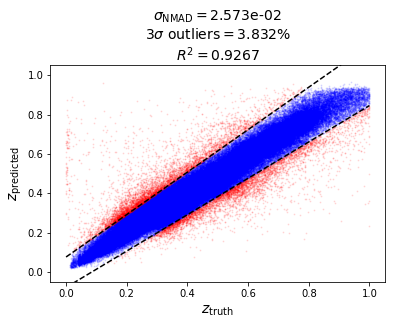

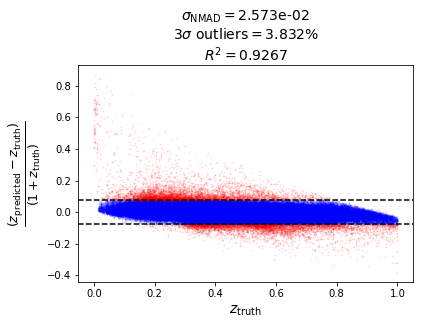

In [4]:
reg = ML.Regressors(data[ALL_NAMES], data["redshift"])
result = reg.RFregressor(max_depth=18, n_estimators=70)
analysis = MLA.RegressionAnalyzer(result["predict"], result["test"], scale_as=z_scale_fn)
analysis.plot_residuals("z", lambda z: f"(1 + {z})", res=False)
plt.savefig("figs/rf-predict.png", bbox_inches="tight"); plt.show()
analysis.plot_residuals("z", lambda z: f"(1 + {z})")
plt.savefig("figs/rf-residual.png", bbox_inches="tight"); plt.show()

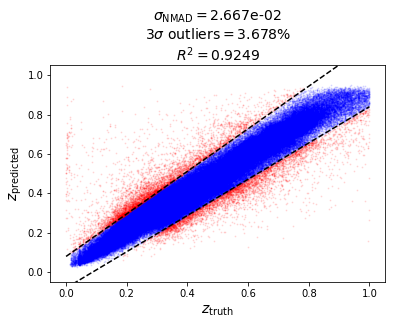

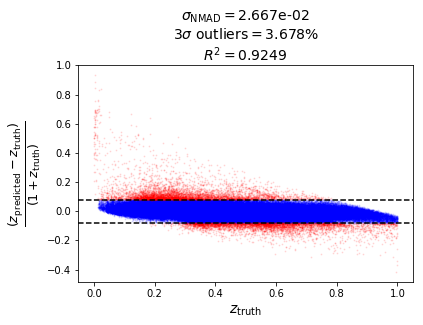

In [57]:
reg = ML.Regressors(data[ALL_NAMES], data["redshift"], apply_pca=True)
result = reg.RFregressor(max_depth=18, n_estimators=70)
analysis = MLA.RegressionAnalyzer(result["predict"], result["test"], scale_as=z_scale_fn)
analysis.plot_residuals("z", lambda z: f"(1 + {z})", res=False)
plt.savefig("figs/rf-predict-pca.png", bbox_inches="tight"); plt.show()
analysis.plot_residuals("z", lambda z: f"(1 + {z})")
plt.savefig("figs/rf-residual-pca.png", bbox_inches="tight"); plt.show()

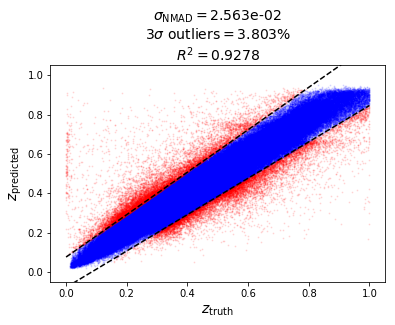

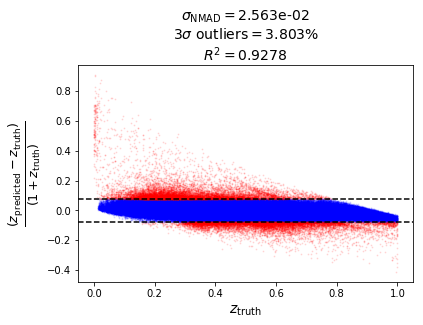

In [29]:
reg = ML.Regressors(data[ALL_NAMES], data["redshift"])
result = reg.RFregressor(max_depth=18, n_estimators=70, cross_validation=True)
analysis = MLA.RegressionAnalyzer(result["predict"], result["test"], scale_as=z_scale_fn)
analysis.plot_residuals("z", lambda z: f"(1 + {z})", res=False)
plt.savefig("figs/rf-predict-cross-val.png", bbox_inches="tight"); plt.show()
analysis.plot_residuals("z", lambda z: f"(1 + {z})")
plt.savefig("figs/rf-residual-cross-val.png", bbox_inches="tight"); plt.show()

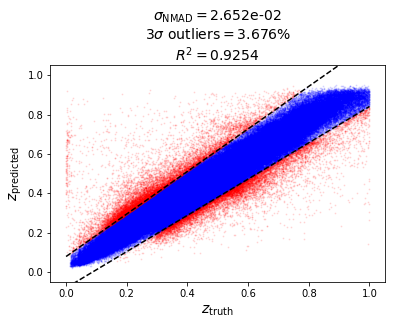

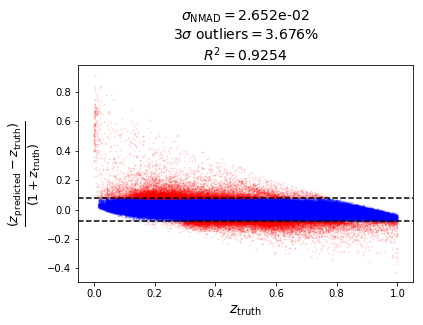

In [58]:
reg = ML.Regressors(data[ALL_NAMES], data["redshift"], apply_pca=True)
result = reg.RFregressor(max_depth=18, n_estimators=70, cross_validation=True)
analysis = MLA.RegressionAnalyzer(result["predict"], result["test"], scale_as=z_scale_fn)
analysis.plot_residuals("z", lambda z: f"(1 + {z})", res=False)
plt.savefig("figs/rf-predict-cross-val-pca.png", bbox_inches="tight"); plt.show()
analysis.plot_residuals("z", lambda z: f"(1 + {z})")
plt.savefig("figs/rf-residual-cross-val-pca.png", bbox_inches="tight"); plt.show()

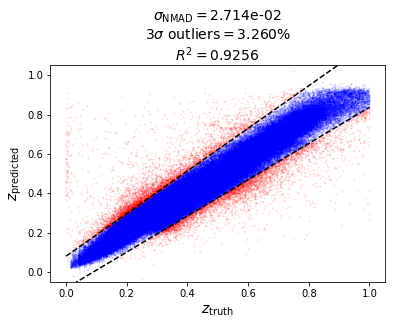

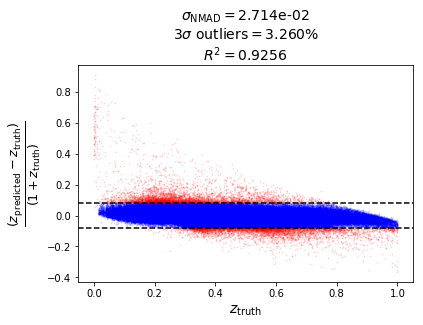

In [35]:
reg = ML.Regressors(data[ALL_NAMES], data["redshift"])
result = reg.GBregressor(learning_rate=.25, n_estimators=120)
analysis = MLA.RegressionAnalyzer(result["predict"], result["test"], scale_as=z_scale_fn)
analysis.plot_residuals("z", lambda z: f"(1 + {z})", res=False)
plt.savefig("figs/gb-predict.png", bbox_inches="tight"); plt.show()
analysis.plot_residuals("z", lambda z: f"(1 + {z})")
plt.savefig("figs/gb-residual.png", bbox_inches="tight"); plt.show()"

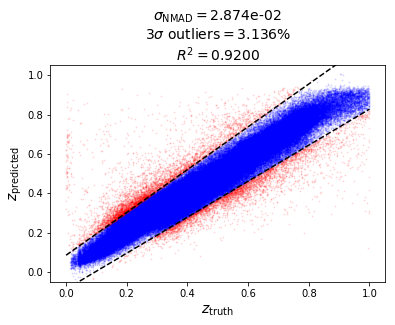

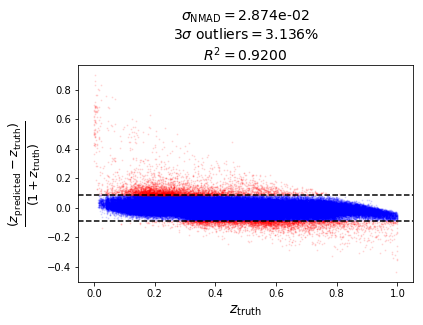

In [59]:
reg = ML.Regressors(data[ALL_NAMES], data["redshift"], apply_pca=True)
result = reg.GBregressor(learning_rate=.25, n_estimators=120)
analysis = MLA.RegressionAnalyzer(result["predict"], result["test"], scale_as=z_scale_fn)
analysis.plot_residuals("z", lambda z: f"(1 + {z})", res=False)
plt.savefig("figs/gb-predict-pca.png", bbox_inches="tight"); plt.show()
analysis.plot_residuals("z", lambda z: f"(1 + {z})")
plt.savefig("figs/gb-residual-pca.png", bbox_inches="tight"); plt.show()

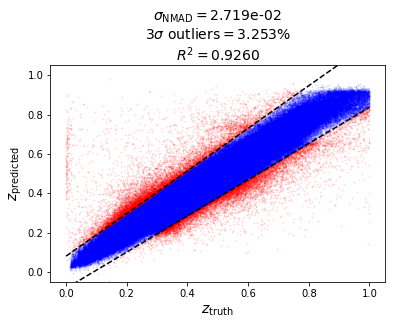

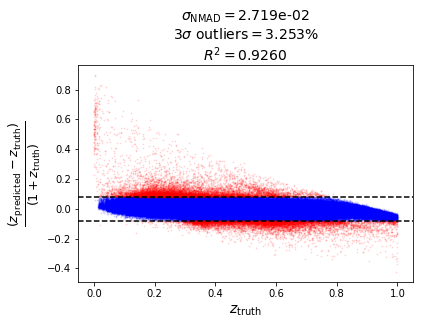

In [39]:
reg = ML.Regressors(data[ALL_NAMES], data["redshift"])
result = reg.GBregressor(learning_rate=.25, n_estimators=120, cross_validation=True)
analysis = MLA.RegressionAnalyzer(result["predict"], result["test"], scale_as=z_scale_fn)
analysis.plot_residuals("z", lambda z: f"(1 + {z})", res=False)
plt.savefig("figs/gb-predict-cross-val.png", bbox_inches="tight"); plt.show()
analysis.plot_residuals("z", lambda z: f"(1 + {z})")
plt.savefig("figs/gb-residual-cross-val.png", bbox_inches="tight"); plt.show()

In [60]:
reg = ML.Regressors(data[ALL_NAMES], data["redshift"], apply_pca=True)
result = reg.GBregressor(learning_rate=.25, n_estimators=120, cross_validation=True)
analysis = MLA.RegressionAnalyzer(result["predict"], result["test"], scale_as=z_scale_fn)
analysis.plot_residuals("z", lambda z: f"(1 + {z})", res=False)
plt.savefig("figs/gb-predict-cross-val-pca.png", bbox_inches="tight"); plt.show()
analysis.plot_residuals("z", lambda z: f"(1 + {z})")
plt.savefig("figs/gb-residual-cross-val-pca.png", bbox_inches="tight"); plt.show()

KeyboardInterrupt: 

In [30]:
def predict(input_names, target_name, func=ML.Regressors.KNN_dregressor, apply_pca=False, 
            data_slice=slice(None), **kwargs):
    t0 = time.time()
    inputs, target = data[input_names], data[target_name]
    reg = ML.Regressors(inputs, target, apply_pca=apply_pca)
    result = func(reg, **kwargs)
    print(f"Running {func.__name__} took {time.time()-t0} seconds")
    return result, reg

def score(*args, **kwargs):
    result,_ = predict(*args, **kwargs)
    analysis = MLA.RegressionAnalyzer(result["predict"], result["test"], scale_as=z_scale_fn)
    score = {
        "r2": analysis.r2(),
        "nmad": analysis.nmad(),
        "outliers": analysis.outlier_frac()
    }
    return score

def all_names_except(leaveout):
    names = ALL_NAMES.copy()
    names.remove(leaveout)
    return names

### Test RF parameters (n_estimators=50, max_depth=18) and GB parameters (n_estimators=100, max_depth=5, learning_rate=0.1)

In [31]:
#gb_results = np.load("figs/gb_results.npy")
#rf_results = np.load("figs/rf_results.npy")

In [32]:
rf_n_estimators_trials = np.arange(25,76,5)
rf_max_depth_trials = np.arange(11,22)
rf_results = [[score(ALL_NAMES, "redshift", func=ML.Regressors.RFregressor, n_estimators=n_estimators,
                      max_depth=max_depth) for max_depth in rf_max_depth_trials] 
                                     for n_estimators in rf_n_estimators_trials]
np.save("figs/rf_results.npy", rf_results)

gb_n_estimators_trials = np.arange(50,155,10)
gb_learning_rate_trials = np.arange(0.05,0.46,0.05)
gb_results = [[score(ALL_NAMES, "redshift", func=ML.Regressors.GBregressor, n_estimators=n_estimators,
                      learning_rate=learning_rate) for learning_rate in gb_learning_rate_trials] 
                                     for n_estimators in gb_n_estimators_trials]
np.save("figs/gb_results.npy", gb_results)

Running RFregressor took 36.49758529663086 seconds
Running RFregressor took 38.54204249382019 seconds
Running RFregressor took 41.93376350402832 seconds
Running RFregressor took 43.26990246772766 seconds
Running RFregressor took 44.59433960914612 seconds
Running RFregressor took 46.42663359642029 seconds
Running RFregressor took 48.849286794662476 seconds
Running RFregressor took 50.191176652908325 seconds
Running RFregressor took 51.893157720565796 seconds
Running RFregressor took 52.889830589294434 seconds
Running RFregressor took 54.375669956207275 seconds
Running RFregressor took 45.356359243392944 seconds
Running RFregressor took 46.748575925827026 seconds
Running RFregressor took 49.65364480018616 seconds
Running RFregressor took 51.377556800842285 seconds
Running RFregressor took 53.43245339393616 seconds
Running RFregressor took 57.46883797645569 seconds
Running RFregressor took 58.26044273376465 seconds
Running RFregressor took 60.49891209602356 seconds
Running RFregressor too

Running GBregressor took 68.23753809928894 seconds
Running GBregressor took 63.88208246231079 seconds
Running GBregressor took 60.215707540512085 seconds
Running GBregressor took 62.78860926628113 seconds
Running GBregressor took 63.66012930870056 seconds
Running GBregressor took 63.931395053863525 seconds
Running GBregressor took 77.64539957046509 seconds
Running GBregressor took 71.5675802230835 seconds
Running GBregressor took 76.93205571174622 seconds
Running GBregressor took 68.4084997177124 seconds
Running GBregressor took 68.37276792526245 seconds
Running GBregressor took 68.18233489990234 seconds
Running GBregressor took 68.42951035499573 seconds
Running GBregressor took 69.18310952186584 seconds
Running GBregressor took 68.51681280136108 seconds
Running GBregressor took 85.66299724578857 seconds
Running GBregressor took 81.48118901252747 seconds
Running GBregressor took 77.3660249710083 seconds
Running GBregressor took 76.72252202033997 seconds
Running GBregressor took 76.0533

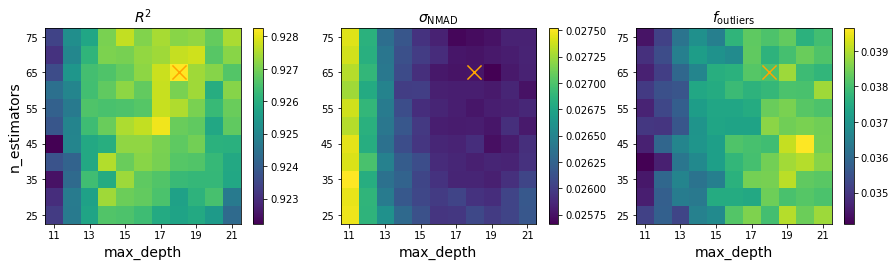

In [47]:
rf_r2 = np.array([[i["r2"] for i in j] for j in rf_results])
rf_nmad = np.array([[i["nmad"] for i in j] for j in rf_results])
rf_outliers = np.array([[i["outliers"] for i in j] for j in rf_results])
fig,(ax0,ax1,ax2) = plt.subplots(figsize=(15,3.6), ncols=3)

cmap = ax0.imshow(rf_r2, origin="lower"); ax0.set_xlabel("max_depth", fontsize=14); ax0.set_ylabel("n_estimators", fontsize=14)
ax0.xaxis.set_ticklabels([0,11,13,15,17,19,21])
ax0.yaxis.set_ticklabels([0,25,35,45,55,65,75])
cbar = plt.colorbar(cmap, ax=ax0); #cbar.ax.set_xlabel("$R^2$", fontsize=14)

cmap = ax1.imshow(rf_nmad, origin="lower"); ax1.set_xlabel("max_depth", fontsize=14);
ax1.xaxis.set_ticklabels([0,11,13,15,17,19,21])
ax1.yaxis.set_ticklabels([0,25,35,45,55,65,75])
cbar = plt.colorbar(cmap, ax=ax1); #cbar.ax.set_xlabel("$\\sigma_{\\rm NMAD}$", fontsize=14)

cmap = ax2.imshow(rf_outliers, origin="lower"); ax2.set_xlabel("max_depth", fontsize=14);
ax2.xaxis.set_ticklabels([0,11,13,15,17,19,21])
ax2.yaxis.set_ticklabels([0,25,35,45,55,65,75])
cbar = plt.colorbar(cmap, ax=ax2); #cbar.ax.set_xlabel("$f_{\\rm outliers}$", fontsize=14);
ax0.set_title("$R^2$",fontsize=14); ax1.set_title("$\\sigma_{\\rm NMAD}$",fontsize=14); ax2.set_title("$f_{\\rm outliers}$",fontsize=14)

[ax.scatter(7,8,color="orange",marker="x",s=200) for ax in [ax0,ax1,ax2]]
plt.savefig("figs/rf-scoring.png", bbox_inches="tight")

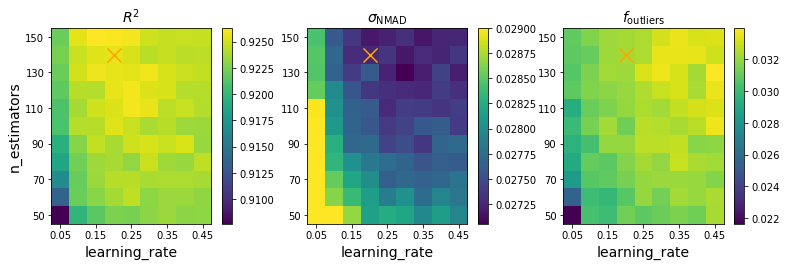

In [49]:
gb_r2 = np.array([[i["r2"] for i in j] for j in gb_results])
gb_nmad = np.array([[i["nmad"] for i in j] for j in gb_results])
gb_outliers = np.array([[i["outliers"] for i in j] for j in gb_results])
fig,(ax0,ax1,ax2) = plt.subplots(figsize=(13,3.6), ncols=3)

cmap = ax0.imshow(gb_r2, origin="lower"); ax0.set_xlabel("learning_rate", fontsize=14); ax0.set_ylabel("n_estimators", fontsize=14)
ax0.xaxis.set_ticklabels([0,.05,.15,.25,.35,.45])
ax0.yaxis.set_ticklabels([0,50,70,90,110,130,150])
cbar = plt.colorbar(cmap, ax=ax0); #cbar.ax.set_xlabel("$R^2$", fontsize=14)

cmap = ax1.imshow(gb_nmad, origin="lower", vmax=.029); ax1.set_xlabel("learning_rate", fontsize=14);
ax1.xaxis.set_ticklabels([0,.05,.15,.25,.35,.45])
ax1.yaxis.set_ticklabels([0,50,70,90,110,130,150])
cbar = plt.colorbar(cmap, ax=ax1); #cbar.ax.set_xlabel("$\\sigma_{\\rm NMAD}$", fontsize=14)

cmap = ax2.imshow(gb_outliers, origin="lower"); ax2.set_xlabel("learning_rate", fontsize=14);
ax2.xaxis.set_ticklabels([0,.05,.15,.25,.35,.45])
ax2.yaxis.set_ticklabels([0,50,70,90,110,130,150])
cbar = plt.colorbar(cmap, ax=ax2); #cbar.ax.set_xlabel("$f_{\\rm outliers}$", fontsize=14);
ax0.set_title("$R^2$",fontsize=14); ax1.set_title("$\\sigma_{\\rm NMAD}$",fontsize=14); ax2.set_title("$f_{\\rm outliers}$",fontsize=14)

[ax.scatter(3,9,color="orange",marker="x",s=200) for ax in [ax0,ax1,ax2]]
plt.savefig("figs/gb-scoring.png", bbox_inches="tight")

### Test each regressor using all features, with and without PCA, to determine which is the best

- Use all features and default regressor parameters
- Test with and without PCA

In [79]:
funcs = [ML.Regressors.RFregressor, 
         ML.Regressors.KNN_dregressor, 
         ML.Regressors.GBregressor, 
         ML.Regressors.Xgboostregressor]
best_results_pca = []
best_results = []
for func in fun
    best_results_pca.append(predict(ALL_NAMES, "redshift", func=func, 
                                    apply_pca=True, cross_validation=True))
    best_results.append(predict(ALL_NAMES, "redshift", func=func, 
                                    apply_pca=False, cross_validation=True))

Running RFregressor took 980.4264924526215 seconds
Running RFregressor took 968.0869839191437 seconds
Running KNN_dregressor took 137.60170888900757 seconds
Running KNN_dregressor took 135.59103655815125 seconds
Running GBregressor took 809.4325215816498 seconds
Running GBregressor took 791.7341785430908 seconds


/home/alan/local/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


Running Xgboostregressor took 858.0984725952148 seconds


/home/alan/local/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


Running Xgboostregressor took 851.0949003696442 seconds


In [61]:
def plot_best_results(results):
    results, regs = zip(*results)
    x = np.array(["RF", "KNN_d", "GB", "Xgboost"])
    argr = np.argsort([reg.test["r2"] for reg in regs])[::-1]
    argn = np.argsort([reg.test["nmad"] for reg in regs])
    argo = np.argsort([reg.test["outliers"] for reg in regs])
    arg2 = np.argsort([reg.test["outliers"] + reg.test["nmad"] for reg in regs])

    plt.figure(figsize=(10,1))
    plt.bar(x[argr],np.array([reg.test["r2"] for reg in regs])[argr]); plt.ylim([.917,.93]); plt.ylabel("$R^2$")
    plt.figure(figsize=(10,1))
    plt.bar(x[argn],np.array([reg.test["nmad"] for reg in regs])[argn]); plt.ylim(bottom=.025); plt.ylabel("$\\sigma_{\\rm NMAD}$")
    plt.figure(figsize=(10,1))
    plt.bar(x[argo],np.array([reg.test["outliers"] for reg in regs])[argo]); plt.ylim(bottom=.03); plt.ylabel("$f_{\\rm outlier}$")
    plt.figure(figsize=(10,1))
    plt.bar(x[argo],np.array([reg.test["outliers"] + reg.test["nmad"] for reg in regs])[arg2]); plt.ylim(bottom=.055); plt.ylabel("$f_{\\rm outlier} + \\sigma_{\\rm NMAD}$")

print([result_pca[1].test["r2"]-result[1].test["r2"] for (result,result_pca) in zip(best_results,best_results_pca)])
print([result[1].test["nmad"]-result_pca[1].test["nmad"] for (result,result_pca) in zip(best_results,best_results_pca)])
print([result[1].test["outliers"]-result_pca[1].test["outliers"] for (result,result_pca) in zip(best_results,best_results_pca)])
print("No PCA:")
plot_best_results(best_results); plt.savefig("figs/method-compare.png", bbox_inches="tight"); plt.show()
print("With PCA:")
plot_best_results(best_results_pca)

NameError: name 'best_results' is not defined

In [78]:
ALL_NAMES

['gminr', 'rminz', 'zminw1', 'w1minw2', 'rmag', 'radius', 'expscale']

### Test leaving out one feature at a time

In [41]:
input_names_trials = [all_names_except(name) for name in ALL_NAMES] + [ALL_NAMES]
target_name = "redshift"

results = [score(names, target_name, cross_validation=True) for names in input_names_trials]
results_pca = [score(names, target_name, apply_pca=True, cross_validation=True) for names in input_names_trials]
np.save("figs/leave-out-features.npy", [results, results_pca, None])

Running KNN_dregressor took 31.558427572250366 seconds
Running KNN_dregressor took 31.8363254070282 seconds
Running KNN_dregressor took 30.60462522506714 seconds
Running KNN_dregressor took 29.361881256103516 seconds
Running KNN_dregressor took 32.08318877220154 seconds
Running KNN_dregressor took 32.25717854499817 seconds
Running KNN_dregressor took 48.23951482772827 seconds
Running KNN_dregressor took 54.28958463668823 seconds
Running KNN_dregressor took 30.848155736923218 seconds
Running KNN_dregressor took 31.10153889656067 seconds
Running KNN_dregressor took 29.88043522834778 seconds
Running KNN_dregressor took 29.01733684539795 seconds
Running KNN_dregressor took 31.139562368392944 seconds
Running KNN_dregressor took 31.64879298210144 seconds
Running KNN_dregressor took 47.6916766166687 seconds
Running KNN_dregressor took 55.606749057769775 seconds


[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
No PCA:


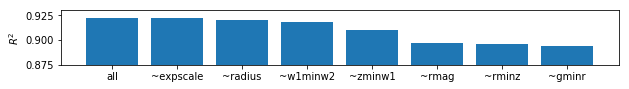

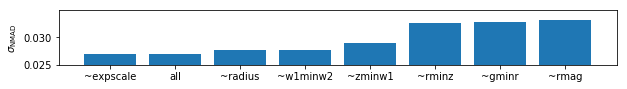

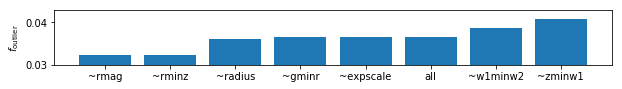

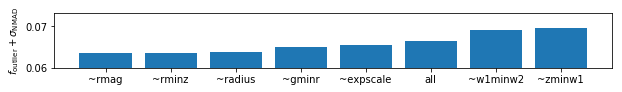

With PCA:


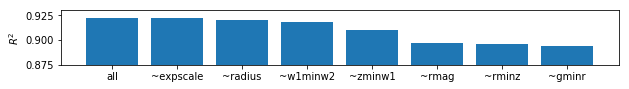

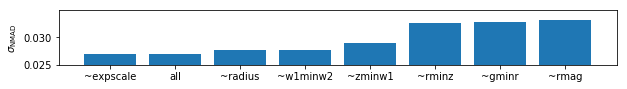

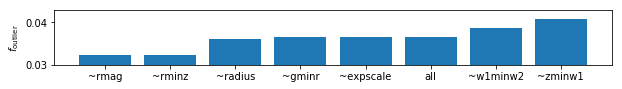

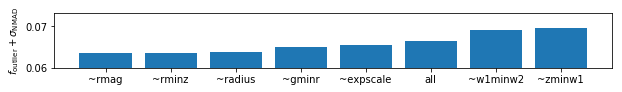

In [64]:
def plot_results(scores):
    x = np.array(["~"+name for name in ALL_NAMES] + ["all"])
    argr = np.argsort([score["r2"] for score in scores])[::-1]
    argn = np.argsort([score["nmad"] for score in scores])
    argo = np.argsort([score["outliers"] for score in scores])
    arg2 = np.argsort([score["outliers"] + score["nmad"] for score in scores])

    plt.figure(figsize=(10,1))
    plt.bar(x[argr],np.array([score["r2"] for score in scores])[argr]); plt.ylim([.875,.93]); plt.ylabel("$R^2$")
    plt.savefig("figs/feature-compare-r2.png", bbox_inches="tight"); plt.show()
    plt.figure(figsize=(10,1))
    plt.bar(x[argn],np.array([score["nmad"] for score in scores])[argn]); plt.ylim(bottom=.025); plt.ylabel("$\\sigma_{\\rm NMAD}$")
    plt.savefig("figs/feature-compare-sigma.png", bbox_inches="tight"); plt.show()
    plt.figure(figsize=(10,1))
    plt.bar(x[argo],np.array([score["outliers"] for score in scores])[argo]); plt.ylim(bottom=.03); plt.ylabel("$f_{\\rm outlier}$")
    plt.savefig("figs/feature-compare-fout.png", bbox_inches="tight"); plt.show()
    plt.figure(figsize=(10,1))
    plt.bar(x[argo],np.array([score["outliers"] + score["nmad"] for score in scores])[arg2]); plt.ylim(bottom=.06); plt.ylabel("$f_{\\rm outlier} + \\sigma_{\\rm NMAD}$")

print([result_pca["r2"]-result["r2"] for (result,result_pca) in zip(results,results_pca)])
print([result["nmad"]-result_pca["nmad"] for (result,result_pca) in zip(results,results_pca)])
print([result["outliers"]-result_pca["outliers"] for (result,result_pca) in zip(results,results_pca)])
print("No PCA:")
plot_results(results); plt.savefig("figs/feature-compare.png", bbox_inches="tight"); plt.show()
print("With PCA:")
plot_results(results_pca)

# Below is the result obtained without selecting radius < 30

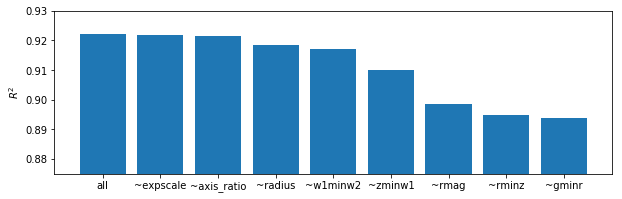

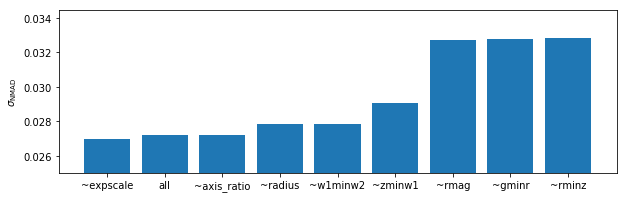

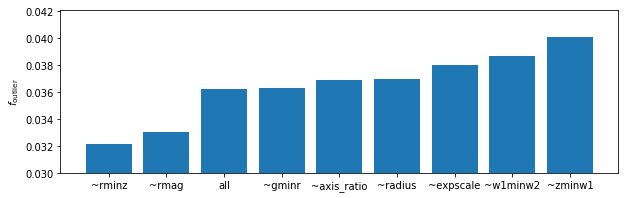

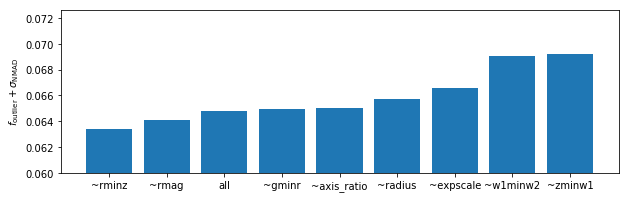

In [62]:
x = np.array(["~"+name for name in ALL_NAMES] + ["all"])
argr = np.argsort([result["r2"][0] for result in results])[::-1]
argn = np.argsort([result["nmad"][0] for result in results])
argo = np.argsort([result["outliers"][0] for result in results])
arg2 = np.argsort([result["outliers"][0] + result["nmad"][0] for result in results])

plt.figure(figsize=(10,3))
plt.bar(x[argr],np.array([result["r2"][0] for result in results])[argr]); plt.ylim([.875,.93]); plt.ylabel("$R^2$")
plt.figure(figsize=(10,3))
plt.bar(x[argn],np.array([result["nmad"][0] for result in results])[argn]); plt.ylim(bottom=.025); plt.ylabel("$\\sigma_{\\rm NMAD}$");
plt.figure(figsize=(10,3))
plt.bar(x[argo],np.array([result["outliers"][0] for result in results])[argo]); plt.ylim(bottom=.03); plt.ylabel("$f_{\\rm outlier}$");
plt.figure(figsize=(10,3))
plt.bar(x[argo],np.array([result["outliers"][0] + result["nmad"][0] for result in results])[arg2]); plt.ylim(bottom=.06); plt.ylabel("$f_{\\rm outlier} + \\sigma_{\\rm NMAD}$");

### Trials using p_exp and logprob_exp instead of expscale

Running RFregressor took 95.89278054237366 seconds
Running KNNregressor took 12.307918310165405 seconds
Running KNN_dregressor took 23.21302628517151 seconds


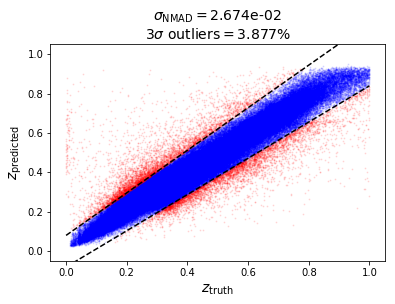

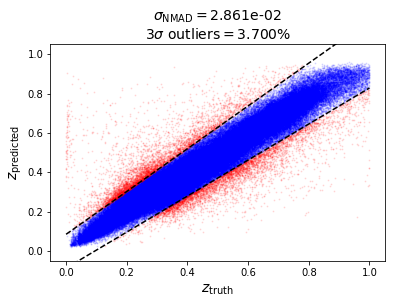

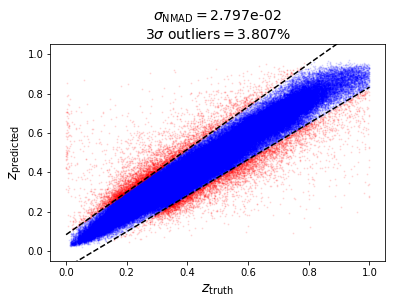

In [20]:
input_names = ["gminr", "rminz", "zminw1", "w1minw2", "gmag", "p_exp"]
target_name = "redshift"

funcs = [ML.Regressors.RFregressor, ML.Regressors.KNNregressor, ML.Regressors.KNN_dregressor]
results = [predict(input_names, target_name, func) for func in funcs]

def f(z):
    ans = z.copy()
    ans[z < 0.5] = (1 - z[z < 0.5])**3/(1-.5)**3*.5
    return 1+z
f_label = lambda target: f"(1 + {target})"
target_label = "z"
for result in results:
    analysis = MLA.RegressionAnalyzer(result["predict"], result["test"], scale_as=f)
    plt.figure()
    analysis.plot_residuals(target_label, f_label, res=False)

Running RFregressor took 88.39898228645325 seconds
Running KNNregressor took 13.181779384613037 seconds
Running KNN_dregressor took 16.232118606567383 seconds


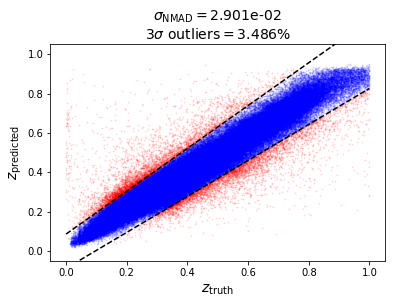

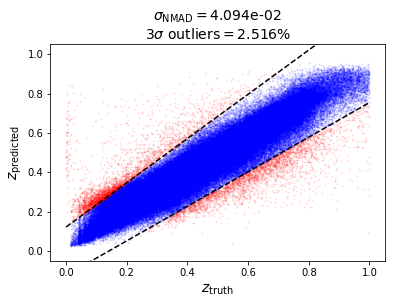

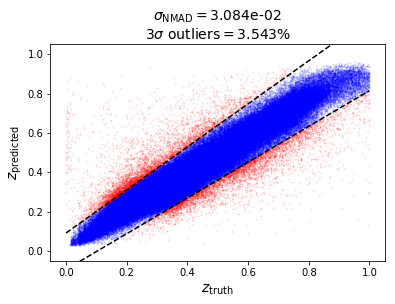

In [21]:
input_names = ["gmag", "rmag", "zmag", "w1mag", "w2mag", "logprob_exp"]
target_name = "redshift"

funcs = [ML.Regressors.RFregressor, ML.Regressors.KNNregressor, ML.Regressors.KNN_dregressor]
results = [predict(input_names, target_name, func) for func in funcs]

def f(z):
    ans = z.copy()
    ans[z < 0.5] = (1 - z[z < 0.5])**3/(1-.5)**3*.5
    return 1+z
f_label = lambda target: f"(1 + {target})"
target_label = "z"
for result in results:
    analysis = MLA.RegressionAnalyzer(result["predict"], result["test"], scale_as=f)
    plt.figure()
    analysis.plot_residuals(target_label, f_label, res=False)

# Selection Plots

In [ ]:
alldata = importdata.importdata(mask_stars=False)

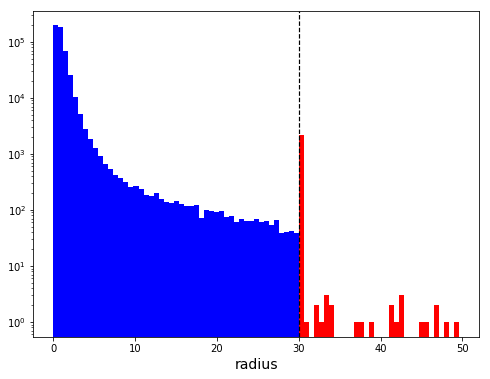

In [58]:
goodbins = np.linspace(0,30,50)
badbins = np.arange(goodbins[-1], 50, np.diff(goodbins)[-1])

plt.figure(figsize=(8,6))
plt.hist(alldata.radius, bins=goodbins, color="blue")
plt.hist(alldata.radius, bins=badbins, color="red")

plt.xlabel("radius", fontsize=14)
plt.axvline(30, color="k", ls="--", lw=1.2)
plt.semilogy();
plt.savefig("figs/radius-selection.png", bbox_inches="tight")

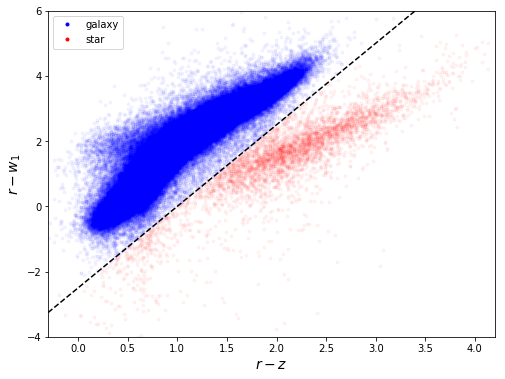

In [35]:
def plot_line(m,b):
    x = np.linspace(-1,4)
    y = m*x + b
    plt.plot(x,y,"k--")

x,y = alldata["rmag"]-alldata["zmag"], alldata["rmag"]-alldata["w1mag"]
is_star = y < 2.5 * x - 2.5

plt.figure(figsize=(8,6))
plt.plot(x[is_star],y[is_star], "r.", alpha=.04)
plt.plot(x[~is_star],y[~is_star], "b.", alpha=.04)
plt.plot([],[], "b.", label="galaxy")
plt.plot([],[], "r.", label="star")

plt.xlabel("$r-z$", fontsize=14); plt.ylabel("$r-w_1$", fontsize=14)
plt.xlim([-.3,4.2]); plt.ylim([-4,6])
plot_line(2.5,-2.5); plt.legend();
plt.savefig("figs/star-mask.png", bbox_inches="tight")

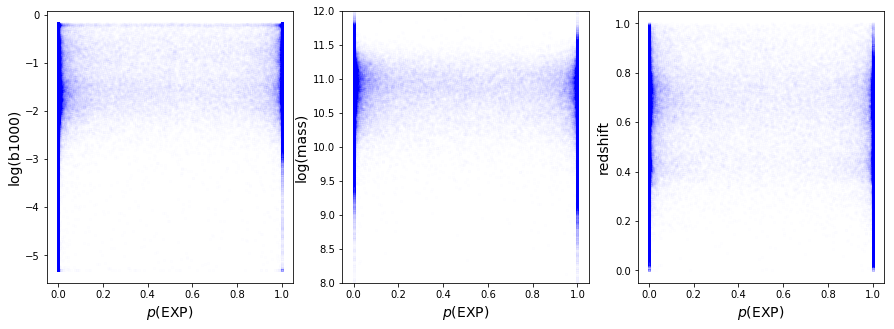

In [101]:
fig,axes = plt.subplots(figsize=(15,5), ncols=3)
[ax.set_xlabel("$p(\\rm EXP)$", fontsize=14) for ax in axes]
axes[0].plot(data.prob_exp, np.log10(data.b1000), "b.", alpha=.005); axes[0].set_ylabel("log(b1000)", fontsize=14)
axes[1].plot(data.prob_exp, data.mass_ir, "b.", alpha=.005); axes[1].set_ylabel("log(mass)", fontsize=14)
axes[2].plot(data.prob_exp, data.redshift, "b.", alpha=.005); axes[2].set_ylabel("redshift", fontsize=14);
axes[1].set_ylim([8,12])
plt.savefig("figs/prob-vs-targets.png", bbox_inches="tight")

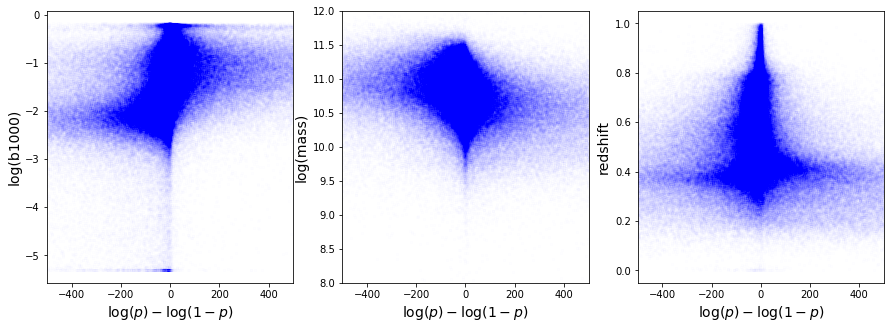

In [100]:
fig,axes = plt.subplots(figsize=(15,5), ncols=3)
[ax.set_xlim((-500,500)) for ax in axes]
[ax.set_xlabel("$\\log(p)-\\log(1-p)$", fontsize=14) for ax in axes]
axes[0].plot(data.expscale, np.log10(data.b1000), "b.", alpha=.005); axes[0].set_ylabel("log(b1000)", fontsize=14)
axes[1].plot(data.expscale, data.mass_ir, "b.", alpha=.005); axes[1].set_ylabel("log(mass)", fontsize=14)
axes[2].plot(data.expscale, data.redshift, "b.", alpha=.005); axes[2].set_ylabel("redshift", fontsize=14);
axes[1].set_ylim([8,12])
plt.savefig("figs/scale-vs-targets.png", bbox_inches="tight")

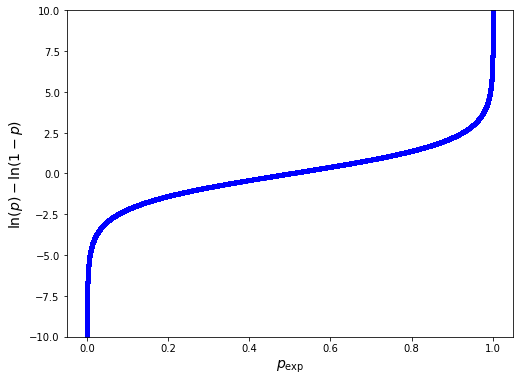

In [102]:
plt.figure(figsize=(8,6))
plt.plot(data.prob_exp, data.expscale, "b."); plt.ylim([-10,10]); plt.xlabel("$p_{\\rm exp}$", fontsize=14)
plt.ylabel("$\\ln(p)-\\ln(1-p)$", fontsize=14);
plt.savefig("figs/double-log-scaling.png")

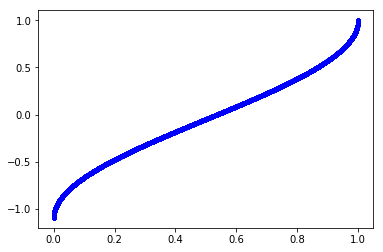

In [99]:
expjeffp = 1. - 4./3.*np.arcsin(np.sqrt(1-data.prob_exp))
plt.plot(data.prob_exp, expjeffp, "b."); plt.show()

In [61]:
ALL_NAMES
all_labels = ["$g-r$", "$r-z$", "$z-w_1$", "$w_1-w_2$", "$r$", "radius", "$\\log(p) - \\log(1-p)$"]

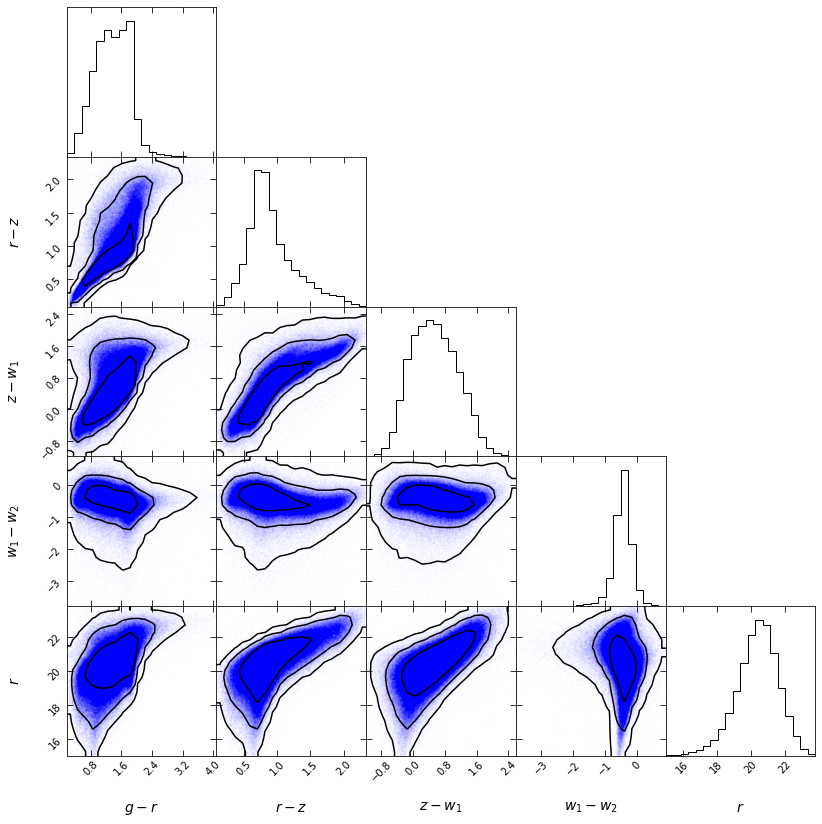

In [90]:
fig = corner.corner(data[data.radius<30][ALL_NAMES[:-2]].values, no_fill_contours=True, plot_density=False, labels=all_labels, 
              label_kwargs={"fontsize":14}, range=[.999,.999,.999,.999,.999],#,.99,.97], 
              data_kwargs={"alpha":.01, "color":"blue"}, levels=[.68,.95,.995]);
fig.subplots_adjust(hspace=0, wspace=0)
[ax.tick_params(which="both", direction="in", length=6, 
                bottom=True, top=True, left=True, right=True) for ax in fig.axes]
[ax.tick_params(which="both", left=False, right=False) for ax in fig.axes[::1+int(np.sqrt(len(fig.axes)))]]
plt.savefig("figs/colors-corner.png", bbox_inches="tight")

In [68]:
pca = PCA()
pca = PCA(n_components=len(ALL_NAMES[:-2]))
principalComponents = pca.fit_transform(data[data.radius<30][ALL_NAMES[:-2]].values)

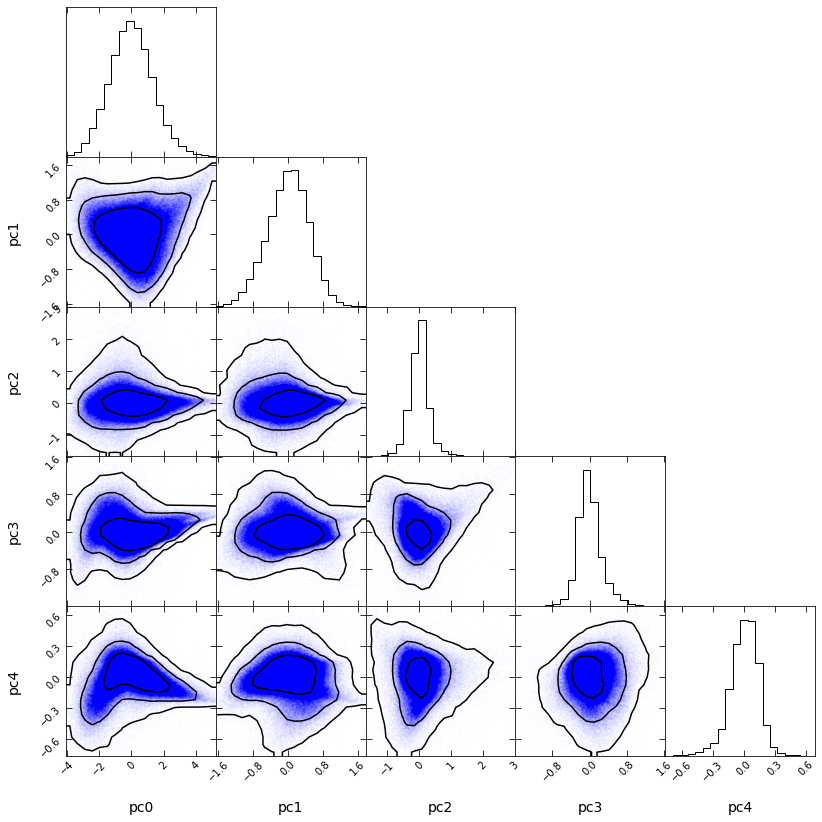

In [91]:
#principalComponents = pca.transform(data[data.radius<30][ALL_NAMES].values)
fig = corner.corner(principalComponents, no_fill_contours=True, plot_density=False, 
              labels=[f"pc{i}" for i in range(len(ALL_NAMES))], label_kwargs={"fontsize":14}, 
              range=[.999,.999,.999,.999,.999], data_kwargs={"alpha":.01, "color":"blue"},
              levels=[.68,.95,.995]);
fig.subplots_adjust(hspace=0, wspace=0)
[ax.tick_params(which="both", direction="in", length=6, 
                bottom=True, top=True, left=True, right=True) for ax in fig.axes]
[ax.tick_params(which="both", left=False, right=False) for ax in fig.axes[::1+int(np.sqrt(len(fig.axes)))]]
plt.savefig("figs/pc-corner.png", bbox_inches="tight")

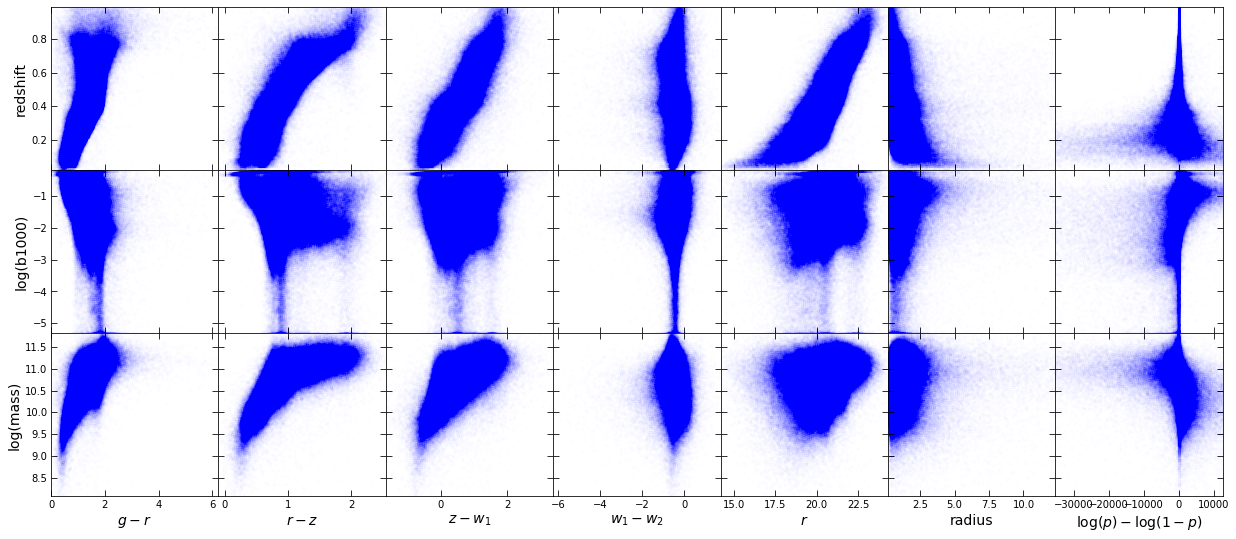

In [83]:
ZRANGE = np.percentile(data.redshift, [.05, 99.95])
MRANGE = np.percentile(np.log10(data.b1000), [.05, 99.95])
BRANGE = np.percentile(data.mass_ir, [.05, 99.95])
def plot_feature(feature, name, axes, range):
    dq = (1-range)*50.
    xrange = np.percentile(feature, [dq, 100-dq])
    [ax.set_xlim(xrange) for ax in axes]
    axes[0].plot(feature, data.redshift, "b.", alpha=.005); axes[0].set_ylim(ZRANGE)
    axes[1].plot(feature, np.log10(data.b1000), "b.", alpha=.005); axes[1].set_ylim(MRANGE)
    axes[2].plot(feature, data.mass_ir, "b.", alpha=.005); axes[2].set_ylim(BRANGE)

def make_feature_plot(features, names, labels=None, ranges=None):
    labels = names if (labels is None) else labels
    ranges = [.999] * len(features) if ranges is None else ranges
    fig,axes = plt.subplots(figsize=(3*len(features),9), nrows=3, ncols=(len(features)), 
                            gridspec_kw={"hspace":0, "wspace":0})
    axes[0,0].set_ylabel("redshift", fontsize=14)
    axes[1,0].set_ylabel("log(b1000)", fontsize=14)
    axes[2,0].set_ylabel("log(mass)", fontsize=14)
    [[axes[i,j].tick_params(which="both", direction="in", length=6, 
                            bottom=True, top=True, left=True, right=True)
                            for i in range(3)] for j in range(len(features))]
    [axes[-1,i].set_xlabel(f"{labels[i]}", fontsize=14) for i in range(len(features))]
    [[axes[i,j].xaxis.set_major_formatter(plt.NullFormatter()) for i in range(2)] for j in range(len(features))]
    [[axes[i,j].yaxis.set_major_formatter(plt.NullFormatter()) for i in range(3)] for j in range(1,len(features))]
    for i in range(len(features)):
        plot_feature(features[i], names[i], axes[:,i], ranges[i])

make_feature_plot(data[ALL_NAMES].values.T, ALL_NAMES, labels=all_labels, ranges=[.9999, .9999, .9999, .9999, .9999, .99, .97])
plt.savefig("figs/features-vs-targets.png", bbox_inches="tight")

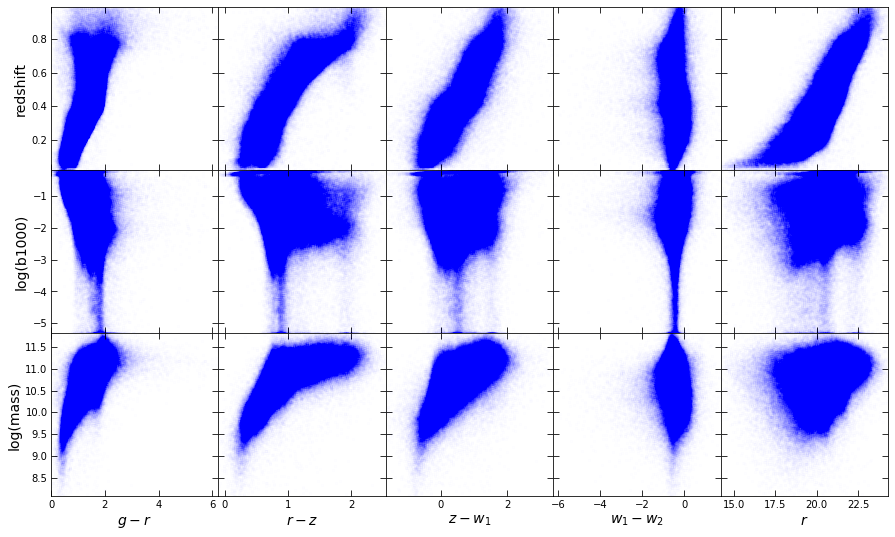

In [84]:
make_feature_plot(data[ALL_NAMES[:-2]].values.T, ALL_NAMES[:-2], labels=all_labels[:-2], ranges=[.9999, .9999, .9999, .9999, .9999])
plt.savefig("figs/colors-vs-targets.png", bbox_inches="tight")

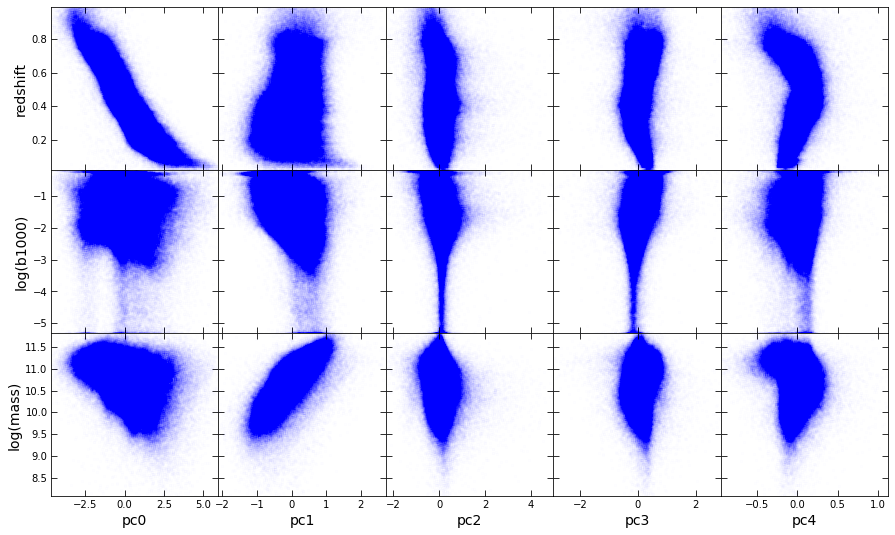

In [85]:
make_feature_plot(principalComponents.T, [f"pc{i}" for i in range(5)], ranges=[.9999, .9999, .9999, .9999, .9999])
plt.savefig("figs/pc-vs-targets.png", bbox_inches="tight")

$$
p(\text{EXP} | \text{EXP or DEV})  \approx \frac{L_\text{EXP}^\text{max}}{ L_\text{EXP}^\text{max} + L_\text{DEV}^\text{max}} = \frac{e^{-\frac{1}{2} \chi_\text{EXP}^2}}{e^{-\frac{1}{2} \chi_\text{EXP}^2} + e^{-\frac{1}{2}\chi^2_\text{DEV}}}
$$

In [160]:
data = data[data.radius<30]